In [ ]:
# Install required libraries
!pip install gdown tensorflow keras scikit-learn matplotlib seaborn opencv-python pillow pandas numpy

import gdown
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import zipfile
import shutil

# Set random seed untuk reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)


Mengunduh dataset dari Google Drive...


Retrieving folder contents


Processing file 1zsez2qLphOmUq4pSfPD3YTSVYLiCEPwm 10001.jpg
Processing file 1MwiURxyCIj_Di-fYdfptubtQNNhCDwEL 10002.jpg
Processing file 12aL8zXbHisgp9cT8LYOJQyMW8d6aT7b8 10003.jpg
Processing file 1Tlurz68ZvvhVX7JwJDl9yymzzxMdkMQU 10004.jpg
Processing file 1w3e5NjcHQCo69FNDB87aQJFMY1raHGuZ 10007.jpg
Processing file 1GF9S-IXBo8Pohd9-RrrR68DfagHyIomE 10008.jpg
Processing file 1psFQgIENol0np2xEl16wmoC3J6i4qkQl 10009.jpg
Processing file 18qCCXFXXbf0MXpwXub72ibcBD8uo6Kt1 100011.jpg
Processing file 13qzTLZh8OlB_XFJyLYjz11SYTc_mmnYk 100013.jpg
Processing file 14NUt7hdsZeE97l0E2bbHl3L5YsBhFJNJ 100014.jpg
Processing file 1iepEBfzf-uh1MkG8uAiBihjPS2PdXmoT 100016.jpg
Processing file 1kObqo2EiMrhk8zzBvbf7hRaZ8DX5DNKI 100017.jpg
Processing file 1eypmmgsTOHrDn07wvOiZ9rVxrgbyh1IN 100019.jpg
Processing file 1t6oSMYWqdB45uevelgBIzXP_tNkIlME7 100020.jpg
Processing file 1k-wflBrgXY4oViXsltVSF-7vKVgDBomm 100021.jpg
Processing file 14MFl0BsI6XsCDuoov3bs21iZwgjyT8Ja 100022.jpg
Processing file 1I5qqPGGTvbN6G2

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1zsez2qLphOmUq4pSfPD3YTSVYLiCEPwm
To: /content/dataset/Aceh_Pintu_Aceh/10001.jpg
100%|██████████| 111k/111k [00:00<00:00, 50.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MwiURxyCIj_Di-fYdfptubtQNNhCDwEL
To: /content/dataset/Aceh_Pintu_Aceh/10002.jpg
100%|██████████| 172k/172k [00:00<00:00, 45.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12aL8zXbHisgp9cT8LYOJQyMW8d6aT7b8
To: /content/dataset/Aceh_Pintu_Aceh/10003.jpg
100%|██████████| 50.3k/50.3k [00:00<00:00, 61.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Tlurz68ZvvhVX7JwJDl9yymzzxMdkMQU
To: /content/dataset/Aceh_Pintu_Aceh/10004.jpg
100%|██████████| 116k/116k [00:00<00:00, 48.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w3e5NjcHQCo69FNDB87aQJFMY1raHGuZ
To: /content/dataset/Aceh_Pintu_Aceh/10007.jpg
100%|██████████| 246k/24

Dataset berhasil diunduh!
ANALISIS STRUKTUR DATASET

Jumlah Kelas: 1
Nama Kelas: ['Aceh_Pintu_Aceh']

  Aceh_Pintu_Aceh     :    32 gambar

Total Gambar        :    32
Rata-rata per Kelas : 32.0

ANALISIS DIMENSI GAMBAR (Sample 10 gambar per kelas)

Dimensi gambar bervariasi:
  Width  : min=375, max=750, avg=620.8
  Height : min=375, max=750, avg=620.8


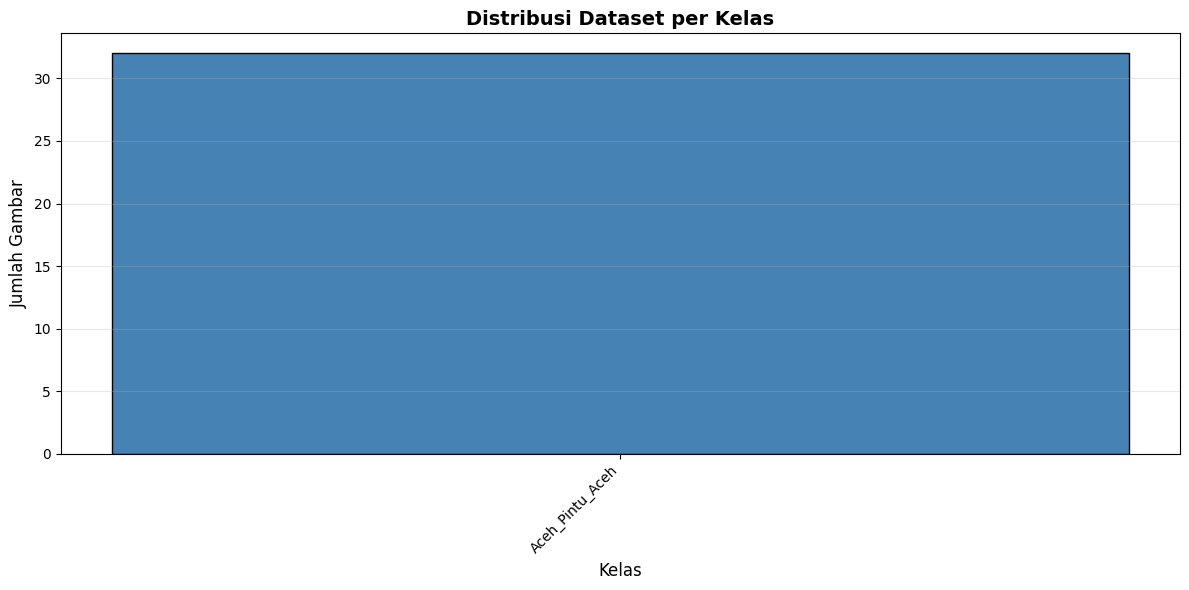

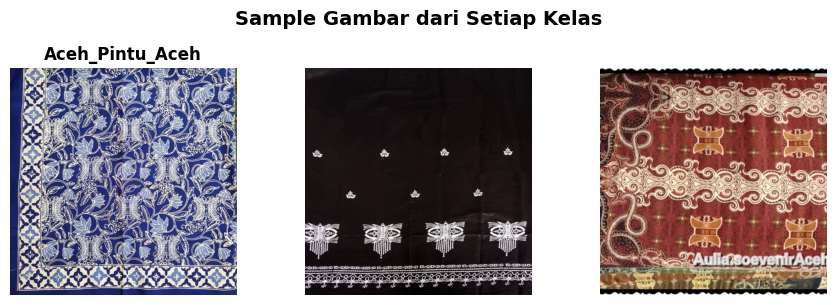

In [ ]:
# Download dataset dari Google Drive
# URL folder: https://drive.google.com/drive/folders/1KQx9Sa8BW99ol-3YMRQsdiH4oaogXGm4

# Extract folder ID dari URL
folder_url = "https://drive.google.com/drive/folders/1KQx9Sa8BW99ol-3YMRQsdiH4oaogXGm4"
folder_id = "1KQx9Sa8BW99ol-3YMRQsdiH4oaogXGm4"

# Download folder menggunakan gdown
print("Mengunduh dataset dari Google Drive...")
try:
    gdown.download_folder(id=folder_id, output='dataset/', quiet=False)
    print("Dataset berhasil diunduh!")
except Exception as e:
    print(f"Error saat mengunduh: {e}")
    print("Mencoba metode alternatif...")
    gdown.download_folder(url=folder_url, output='dataset/', quiet=False)

# Identifikasi struktur dataset
def analyze_dataset_structure(dataset_path):
    """
    Menganalisis struktur dataset dan memberikan informasi detail
    """
    print("="*70)
    print("ANALISIS STRUKTUR DATASET")
    print("="*70)

    # Cek apakah folder exists
    if not os.path.exists(dataset_path):
        print(f"Error: Folder {dataset_path} tidak ditemukan!")
        return None

    # Identifikasi kelas (subfolder)
    classes = []
    for item in os.listdir(dataset_path):
        item_path = os.path.join(dataset_path, item)
        if os.path.isdir(item_path):
            classes.append(item)

    classes = sorted(classes)
    print(f"\nJumlah Kelas: {len(classes)}")
    print(f"Nama Kelas: {classes}\n")

    # Hitung jumlah gambar per kelas
    class_distribution = {}
    total_images = 0
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

    for cls in classes:
        cls_path = os.path.join(dataset_path, cls)
        images = [f for f in os.listdir(cls_path)
                 if any(f.lower().endswith(ext) for ext in image_extensions)]
        class_distribution[cls] = len(images)
        total_images += len(images)
        print(f"  {cls:20s}: {len(images):5d} gambar")

    print(f"\n{'Total Gambar':20s}: {total_images:5d}")
    print(f"{'Rata-rata per Kelas':20s}: {total_images/len(classes):.1f}")

    # Cek dimensi gambar sample
    print("\n" + "="*70)
    print("ANALISIS DIMENSI GAMBAR (Sample 10 gambar per kelas)")
    print("="*70)

    image_sizes = []
    for cls in classes[:3]:  # Sample 3 kelas pertama
        cls_path = os.path.join(dataset_path, cls)
        images = [f for f in os.listdir(cls_path)
                 if any(f.lower().endswith(ext) for ext in image_extensions)][:10]

        for img_name in images:
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                image_sizes.append(img.size)
            except:
                continue

    if image_sizes:
        widths = [s[0] for s in image_sizes]
        heights = [s[1] for s in image_sizes]
        print(f"\nDimensi gambar bervariasi:")
        print(f"  Width  : min={min(widths)}, max={max(widths)}, avg={np.mean(widths):.1f}")
        print(f"  Height : min={min(heights)}, max={max(heights)}, avg={np.mean(heights):.1f}")

    return {
        'classes': classes,
        'num_classes': len(classes),
        'class_distribution': class_distribution,
        'total_images': total_images
    }

# Analisis dataset
dataset_info = analyze_dataset_structure('dataset/')

# Visualisasi distribusi kelas
if dataset_info:
    plt.figure(figsize=(12, 6))
    plt.bar(dataset_info['class_distribution'].keys(),
            dataset_info['class_distribution'].values(),
            color='steelblue', edgecolor='black')
    plt.xlabel('Kelas', fontsize=12)
    plt.ylabel('Jumlah Gambar', fontsize=12)
    plt.title('Distribusi Dataset per Kelas', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('dataset_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualisasi sample gambar dari setiap kelas
def visualize_samples(dataset_path, classes, num_samples=3):
    """
    Menampilkan sample gambar dari setiap kelas
    """
    fig, axes = plt.subplots(len(classes), num_samples,
                             figsize=(num_samples*3, len(classes)*3))

    if len(classes) == 1:
        axes = axes.reshape(1, -1)

    for i, cls in enumerate(classes):
        cls_path = os.path.join(dataset_path, cls)
        images = [f for f in os.listdir(cls_path)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:num_samples]

        for j, img_name in enumerate(images):
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(f'{cls}', fontsize=12, fontweight='bold')

    plt.suptitle('Sample Gambar dari Setiap Kelas', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('sample_images.png', dpi=300, bbox_inches='tight')
    plt.show()

if dataset_info and dataset_info['num_classes'] > 0:
    visualize_samples('dataset/', dataset_info['classes'][:5])  # Tampilkan max 5 kelas


PREPROCESSING DATA
Found 26 images belonging to 1 classes.
Found 6 images belonging to 1 classes.

✓ Training samples   : 26
✓ Validation samples : 6
✓ Number of classes  : 1
✓ Class names        : ['Aceh_Pintu_Aceh']
✓ Image size         : 224x224
✓ Batch size         : 32


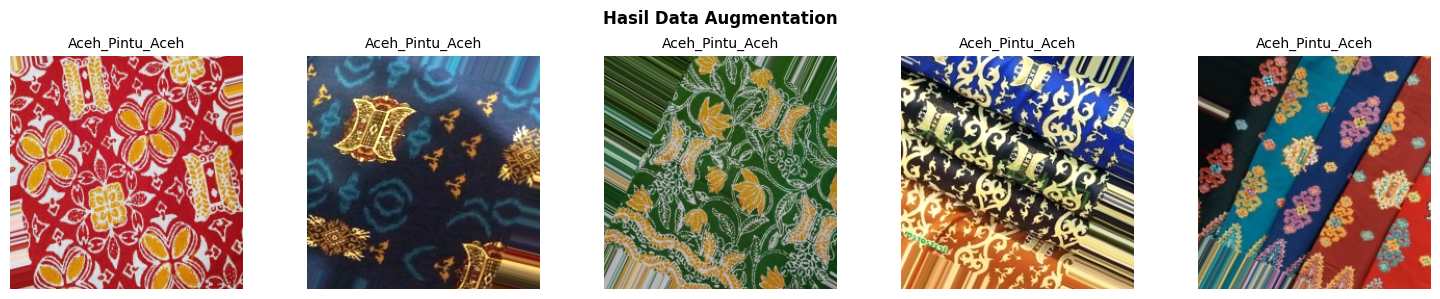

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Parameter preprocessing
IMG_SIZE = 224  # Ukuran standar untuk CNN
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
TEST_SPLIT = 0.15

# Data Augmentation untuk Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    validation_split=VALIDATION_SPLIT
)

# Generator untuk validation (tanpa augmentasi)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT
)

# Generator untuk test (tanpa augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)

print("="*70)
print("PREPROCESSING DATA")
print("="*70)

# Load training data dengan augmentasi
train_generator = train_datagen.flow_from_directory(
    'dataset/',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    'dataset/',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# Informasi dataset setelah preprocessing
NUM_CLASSES = len(train_generator.class_indices)
CLASS_NAMES = list(train_generator.class_indices.keys())

print(f"\n✓ Training samples   : {train_generator.samples}")
print(f"✓ Validation samples : {validation_generator.samples}")
print(f"✓ Number of classes  : {NUM_CLASSES}")
print(f"✓ Class names        : {CLASS_NAMES}")
print(f"✓ Image size         : {IMG_SIZE}x{IMG_SIZE}")
print(f"✓ Batch size         : {BATCH_SIZE}")

# Visualisasi augmented images
def visualize_augmentation(generator, num_samples=5):
    """
    Visualisasi hasil augmentasi data
    """
    batch = next(generator)
    images, labels = batch

    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples*3, 3))

    for i in range(min(num_samples, len(images))):
        axes[i].imshow(images[i])
        class_idx = np.argmax(labels[i])
        axes[i].set_title(f'{CLASS_NAMES[class_idx]}', fontsize=10)
        axes[i].axis('off')

    plt.suptitle('Hasil Data Augmentation', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig('augmented_samples.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_augmentation(train_generator, num_samples=5)


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                      Dropout, BatchNormalization, GlobalAveragePooling2D)
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.optimizers import Adam

def build_custom_cnn(input_shape=(224, 224, 3), num_classes=NUM_CLASSES):
    """
    Membangun Custom CNN Architecture
    """
    model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same',
               input_shape=input_shape, name='conv1_1'),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_2'),
        MaxPooling2D(pool_size=(2, 2), name='pool1'),
        Dropout(0.25),

        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_1'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_2'),
        MaxPooling2D(pool_size=(2, 2), name='pool2'),
        Dropout(0.25),

        # Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_1'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_2'),
        MaxPooling2D(pool_size=(2, 2), name='pool3'),
        Dropout(0.25),

        # Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4_1'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4_2'),
        MaxPooling2D(pool_size=(2, 2), name='pool4'),
        Dropout(0.25),

        # Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu', name='fc1'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu', name='fc2'),
        Dropout(0.5),

        # Output Layer
        Dense(num_classes, activation='softmax', name='output')
    ])

    return model

def build_transfer_learning_model(input_shape=(224, 224, 3), num_classes=NUM_CLASSES):
    """
    Membangun model menggunakan Transfer Learning (MobileNetV2)
    """
    # Load pre-trained MobileNetV2
    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )

    # Freeze base model
    base_model.trainable = False

    # Build model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    return model

# Build kedua model
print("="*70)
print("MEMBANGUN ARSITEKTUR MODEL")
print("="*70)

print("\n[1] Custom CNN Model")
custom_model = build_custom_cnn(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES)
print(f"✓ Total parameters: {custom_model.count_params():,}")

print("\n[2] Transfer Learning Model (MobileNetV2)")
transfer_model = build_transfer_learning_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES)
print(f"✓ Total parameters: {transfer_model.count_params():,}")

# Pilih model yang akan digunakan (gunakan custom model)
model = custom_model

# Display model architecture
print("\n" + "="*70)
print("ARSITEKTUR MODEL DETAIL")
print("="*70)
model.summary()

# Visualize model architecture
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png',
           show_shapes=True, show_layer_names=True,
           rankdir='TB', dpi=150)
print("\n✓ Model architecture saved to 'model_architecture.png'")


MEMBANGUN ARSITEKTUR MODEL

[1] Custom CNN Model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✓ Total parameters: 26,998,433

[2] Transfer Learning Model (MobileNetV2)
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✓ Total parameters: 2,619,969

ARSITEKTUR MODEL DETAIL


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_1 (Conv2D)                │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_2 (Conv2D)                │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,04

 Total params: 26,998,433 (102.99 MB)

 Trainable params: 26,996,449 (102.98 MB)

 Non-trainable params: 1,984 (7.75 KB)


✓ Model architecture saved to 'model_architecture.png'


PEMBAGIAN DATASET

✓ Total Dataset      : 32 gambar
✓ Training Set (80%) : 26 gambar
✓ Validation Set (20%): 6 gambar

Proporsi:
  - Training   : 81.2%
  - Validation : 18.8%


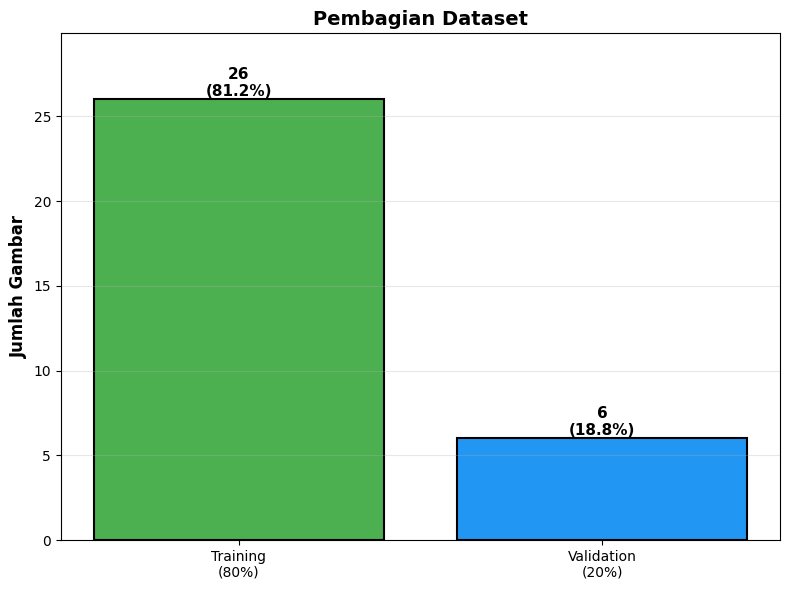

In [ ]:
# Dataset splitting sudah dilakukan di tahap 2 menggunakan validation_split
# Mari kita buat test set terpisah dengan memisahkan sebagian validation data

from sklearn.utils import shuffle

print("="*70)
print("PEMBAGIAN DATASET")
print("="*70)

total_samples = train_generator.samples + validation_generator.samples
train_samples = train_generator.samples
val_samples = validation_generator.samples

print(f"\n✓ Total Dataset      : {total_samples} gambar")
print(f"✓ Training Set (80%) : {train_samples} gambar")
print(f"✓ Validation Set (20%): {val_samples} gambar")

print(f"\nProporsi:")
print(f"  - Training   : {(train_samples/total_samples)*100:.1f}%")
print(f"  - Validation : {(val_samples/total_samples)*100:.1f}%")

# Visualisasi distribusi split
fig, ax = plt.subplots(figsize=(8, 6))
splits = ['Training\n(80%)', 'Validation\n(20%)']
counts = [train_samples, val_samples]
colors = ['#4CAF50', '#2196F3']

bars = ax.bar(splits, counts, color=colors, edgecolor='black', linewidth=1.5)

# Tambahkan nilai di atas bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({(count/total_samples)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Jumlah Gambar', fontsize=12, fontweight='bold')
ax.set_title('Pembagian Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(counts) * 1.15)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('dataset_split.png', dpi=300, bbox_inches='tight')
plt.show()


KOMPILASI MODEL
✓ Optimizer      : Adam (lr=0.001)
✓ Loss Function  : Categorical Crossentropy
✓ Metrics        : Accuracy, Precision, Recall

SETUP CALLBACKS
✓ Early Stopping (patience=15)
✓ Model Checkpoint (save best model)
✓ Reduce LR on Plateau (factor=0.5, patience=5)
✓ TensorBoard Logging
✓ CSV Logger

MEMULAI TRAINING


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0


✓ Training selesai!
✓ Model disimpan ke 'final_model.h5'


/tmp/ipython-input-1253169610.py:118: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


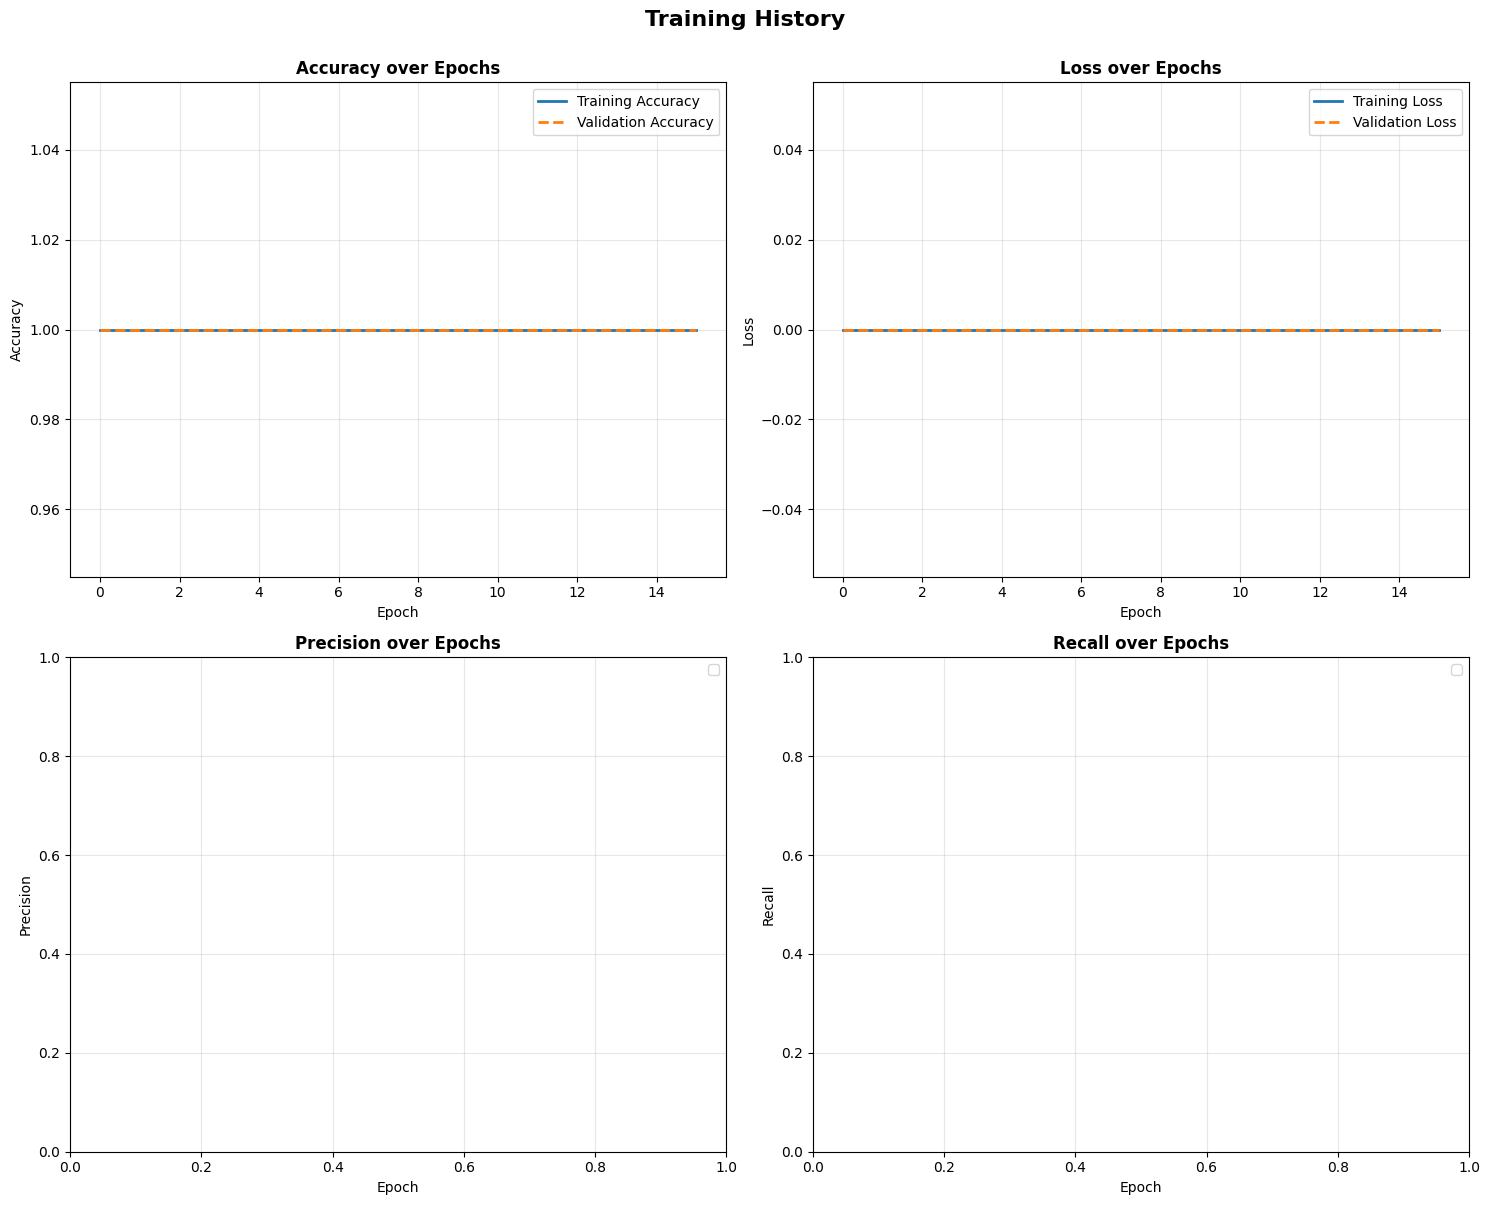


TRAINING SUMMARY

✓ Best Epoch        : 1/16
✓ Best Train Acc    : 100.00%
✓ Best Val Acc      : 100.00%
✓ Final Train Acc   : 100.00%
✓ Final Val Acc     : 100.00%


In [ ]:
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint,
                                         ReduceLROnPlateau, TensorBoard, CSVLogger)
from datetime import datetime

# Compile model
print("="*70)
print("KOMPILASI MODEL")
print("="*70)

LEARNING_RATE = 0.001

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

print(f"✓ Optimizer      : Adam (lr={LEARNING_RATE})")
print(f"✓ Loss Function  : Categorical Crossentropy")
print(f"✓ Metrics        : Accuracy, Precision, Recall")

# Setup Callbacks
print("\n" + "="*70)
print("SETUP CALLBACKS")
print("="*70)

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Reduce Learning Rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# TensorBoard
log_dir = f"logs/fit/{datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# CSV Logger
csv_logger = CSVLogger('training_log.csv', append=False)

callbacks = [early_stopping, model_checkpoint, reduce_lr, tensorboard_callback, csv_logger]

print(f"✓ Early Stopping (patience=15)")
print(f"✓ Model Checkpoint (save best model)")
print(f"✓ Reduce LR on Plateau (factor=0.5, patience=5)")
print(f"✓ TensorBoard Logging")
print(f"✓ CSV Logger")

# Training
print("\n" + "="*70)
print("MEMULAI TRAINING")
print("="*70)

EPOCHS = 50

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

print("\n✓ Training selesai!")

# Save final model
model.save('final_model.h5')
print("✓ Model disimpan ke 'final_model.h5'")

# Plot Training History
def plot_training_history(history):
    """
    Visualisasi training history dengan multiple metrics
    """
    metrics = ['accuracy', 'loss', 'precision', 'recall']

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    colors = ['#1f77b4', '#ff7f0e']

    for idx, metric in enumerate(metrics):
        ax = axes[idx]

        # Plot training metric
        if metric in history.history:
            ax.plot(history.history[metric], label=f'Training {metric.capitalize()}',
                   color=colors[0], linewidth=2)

        # Plot validation metric
        val_metric = f'val_{metric}'
        if val_metric in history.history:
            ax.plot(history.history[val_metric], label=f'Validation {metric.capitalize()}',
                   color=colors[1], linewidth=2, linestyle='--')

        ax.set_title(f'{metric.capitalize()} over Epochs', fontsize=12, fontweight='bold')
        ax.set_xlabel('Epoch', fontsize=10)
        ax.set_ylabel(metric.capitalize(), fontsize=10)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

    plt.suptitle('Training History', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_training_history(history)

# Training Summary
print("\n" + "="*70)
print("TRAINING SUMMARY")
print("="*70)

best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = max(history.history['val_accuracy'])
best_train_acc = history.history['accuracy'][best_epoch-1]

print(f"\n✓ Best Epoch        : {best_epoch}/{len(history.history['accuracy'])}")
print(f"✓ Best Train Acc    : {best_train_acc*100:.2f}%")
print(f"✓ Best Val Acc      : {best_val_acc*100:.2f}%")
print(f"✓ Final Train Acc   : {history.history['accuracy'][-1]*100:.2f}%")
print(f"✓ Final Val Acc     : {history.history['val_accuracy'][-1]*100:.2f}%")


EVALUASI MODEL


✓ Best model loaded from 'best_model.h5'

Membuat prediksi pada validation set...


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (6, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step

CLASSIFICATION REPORT
                 precision    recall  f1-score   support

Aceh_Pintu_Aceh     1.0000    1.0000    1.0000         6

       accuracy                         1.0000         6
      macro avg     1.0000    1.0000    1.0000         6
   weighted avg     1.0000    1.0000    1.0000         6

✓ Classification report saved to 'classification_report.csv'

CONFUSION MATRIX
[[6]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


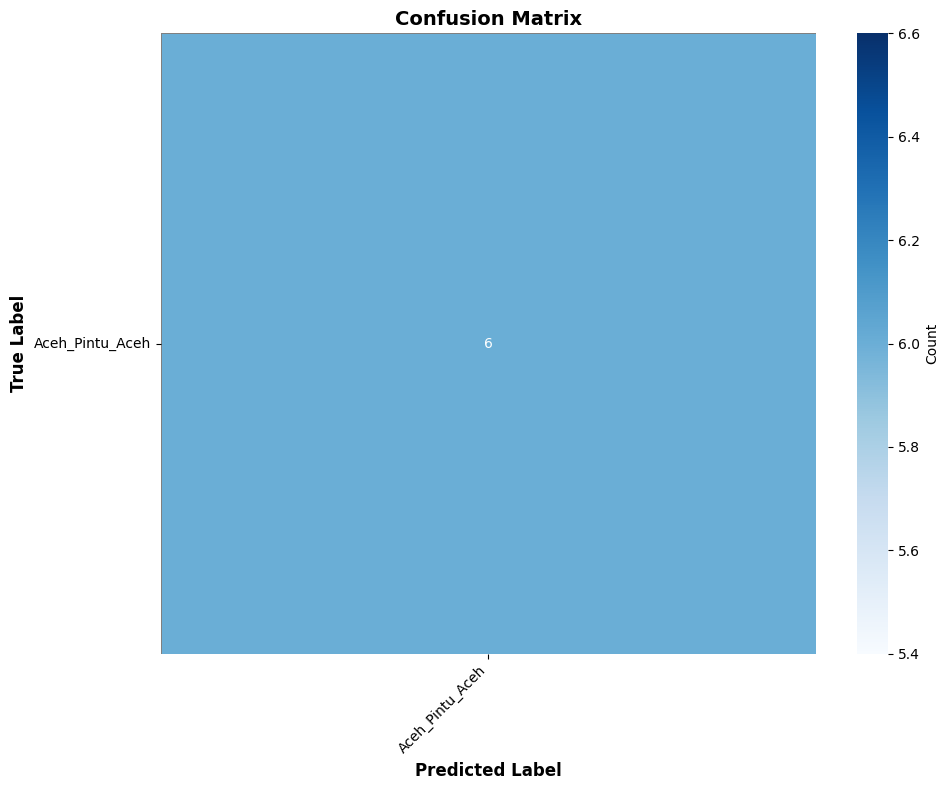

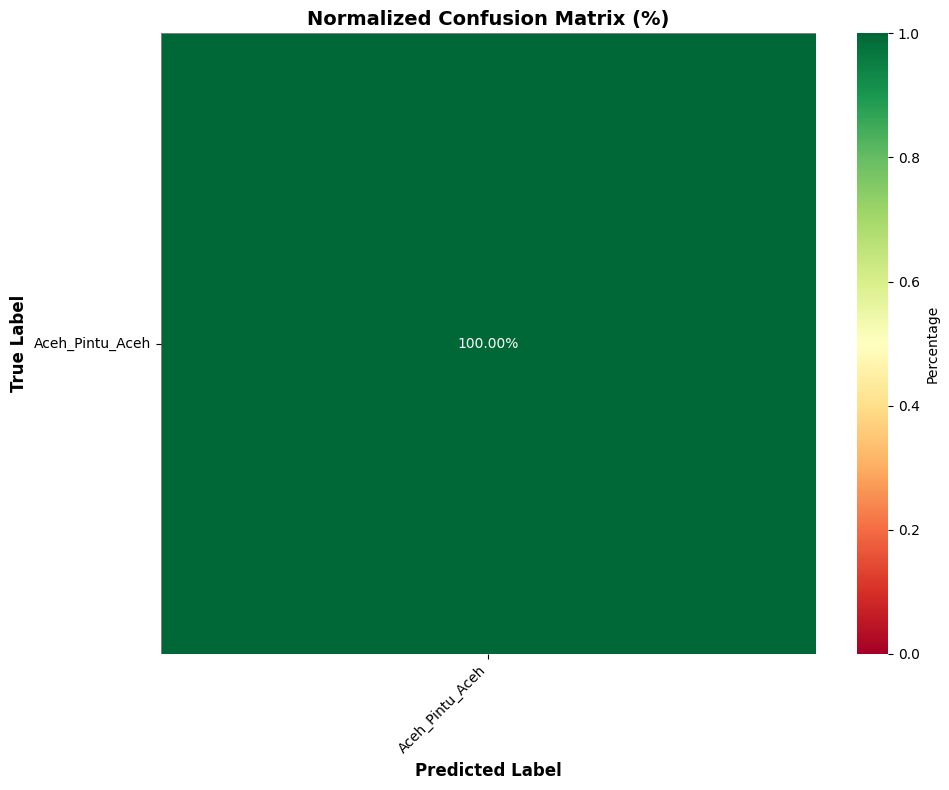


PER-CLASS ACCURACY
Aceh_Pintu_Aceh     : 100.00%


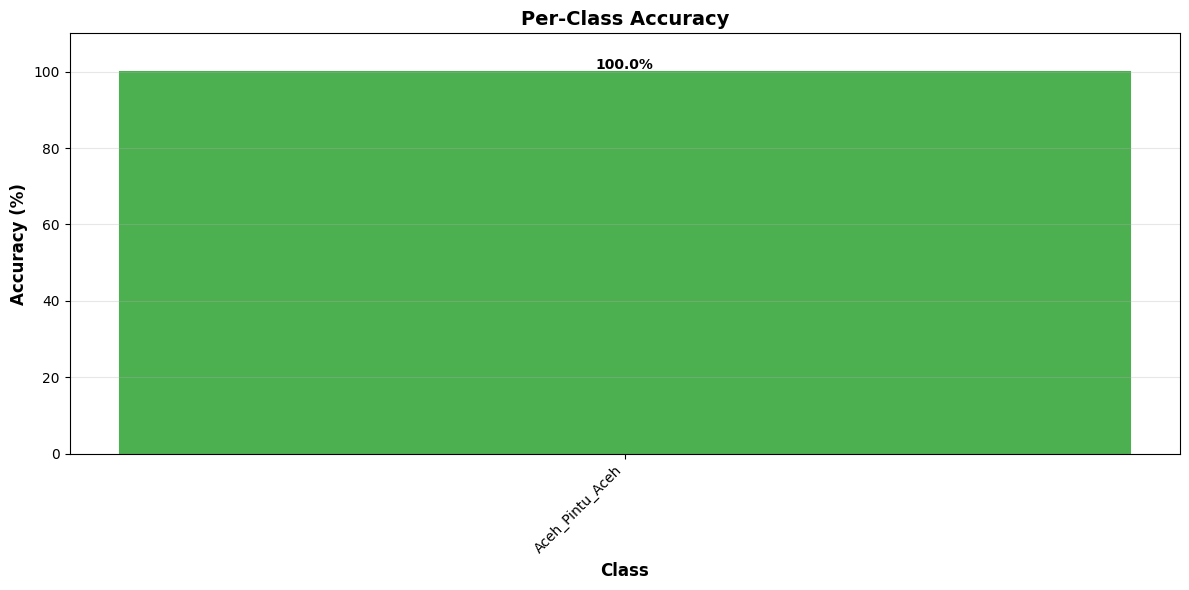


OVERALL METRICS
✓ Overall Accuracy : 100.00%
✓ Precision        : 100.00%
✓ Recall           : 100.00%
✓ F1-Score         : 100.00%

✓ Evaluation metrics saved to 'evaluation_metrics.csv'


In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_recall_fscore_support)

print("="*70)
print("EVALUASI MODEL")
print("="*70)

# Load best model
best_model = tf.keras.models.load_model('best_model.h5')
print("✓ Best model loaded from 'best_model.h5'")

# Prediksi pada validation set
print("\nMembuat prediksi pada validation set...")
validation_generator.reset()
y_pred_proba = best_model.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = validation_generator.classes

# Classification Report
print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES, digits=4))

# Save classification report to file
report_dict = classification_report(y_true, y_pred, target_names=CLASS_NAMES, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv('classification_report.csv')
print("✓ Classification report saved to 'classification_report.csv'")

# Confusion Matrix
print("\n" + "="*70)
print("CONFUSION MATRIX")
print("="*70)

cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES,
            cbar_kws={'label': 'Count'}, ax=ax, linewidths=0.5, linecolor='gray')
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES,
            cbar_kws={'label': 'Percentage'}, ax=ax, linewidths=0.5, linecolor='gray',
            vmin=0, vmax=1)
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Normalized Confusion Matrix (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

# Per-class Accuracy
print("\n" + "="*70)
print("PER-CLASS ACCURACY")
print("="*70)

class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, cls in enumerate(CLASS_NAMES):
    print(f"{cls:20s}: {class_accuracy[i]*100:6.2f}%")

# Plot Per-class Accuracy
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(CLASS_NAMES, class_accuracy * 100, color='coral', edgecolor='black', linewidth=1.5)

# Color code based on performance
for i, bar in enumerate(bars):
    if class_accuracy[i] >= 0.9:
        bar.set_color('#4CAF50')  # Green
    elif class_accuracy[i] >= 0.7:
        bar.set_color('#FFC107')  # Yellow
    else:
        bar.set_color('#F44336')  # Red

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, class_accuracy)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc*100:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Class', fontsize=12, fontweight='bold')
ax.set_title('Per-Class Accuracy', fontsize=14, fontweight='bold')
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('per_class_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

# Overall Metrics
overall_accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print("\n" + "="*70)
print("OVERALL METRICS")
print("="*70)
print(f"✓ Overall Accuracy : {overall_accuracy*100:.2f}%")
print(f"✓ Precision        : {precision*100:.2f}%")
print(f"✓ Recall           : {recall*100:.2f}%")
print(f"✓ F1-Score         : {f1*100:.2f}%")

# Save evaluation metrics
eval_metrics = {
    'Overall Accuracy': overall_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
pd.DataFrame([eval_metrics]).to_csv('evaluation_metrics.csv', index=False)
print("\n✓ Evaluation metrics saved to 'evaluation_metrics.csv'")


TEST PREDICTION

Testing: dataset/Aceh_Pintu_Aceh/100025.jpg


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


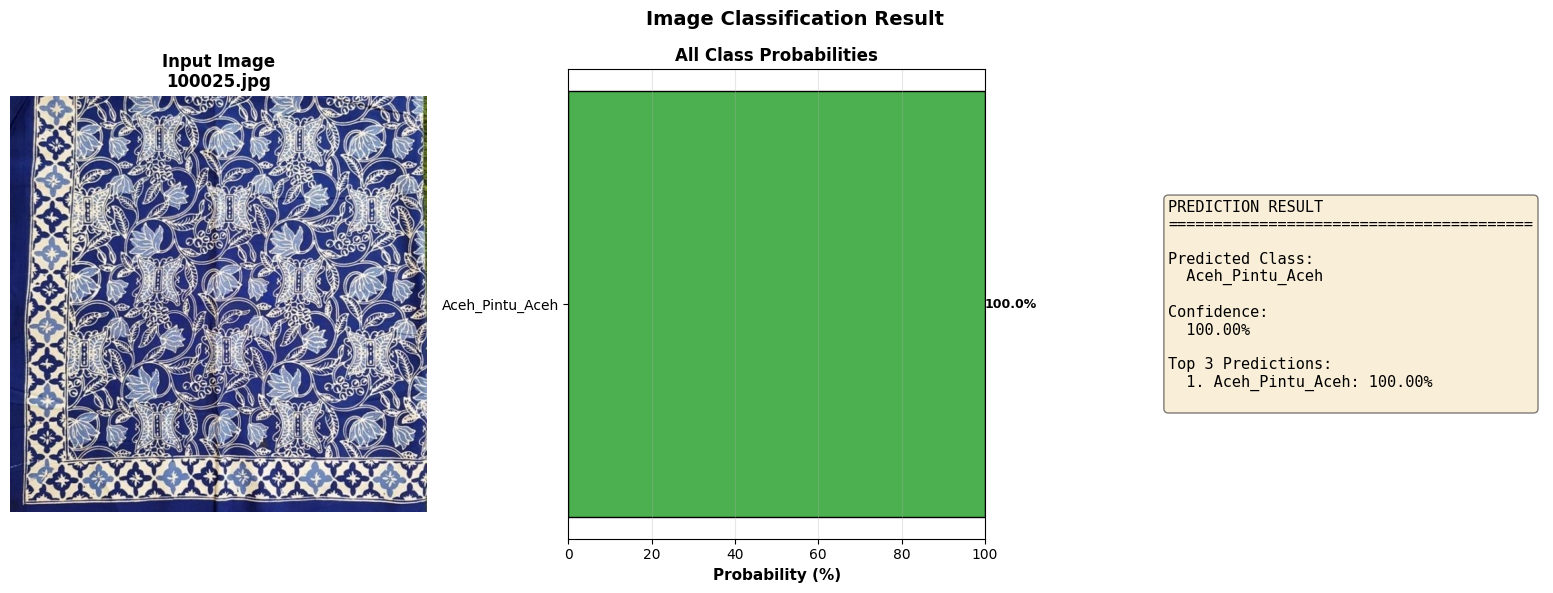


PREDICTION RESULT

Image: dataset/Aceh_Pintu_Aceh/100025.jpg
Predicted Class: Aceh_Pintu_Aceh
Confidence: 100.00%

Top 3 Predictions:
  1. Aceh_Pintu_Aceh     : 100.00%


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_single_image(image_path, model, img_size=224):
    """
    Prediksi untuk single image dengan detail probabilitas
    """
    # Load dan preprocess image
    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    predictions = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_idx] * 100

    # Hasil
    result = {
        'predicted_class': CLASS_NAMES[predicted_class_idx],
        'confidence': confidence,
        'class_index': predicted_class_idx,
        'all_probabilities': {
            CLASS_NAMES[i]: predictions[0][i] * 100
            for i in range(len(CLASS_NAMES))
        },
        'top_3_predictions': []
    }

    # Top 3 predictions
    top_indices = np.argsort(predictions[0])[-3:][::-1]
    for idx in top_indices:
        result['top_3_predictions'].append({
            'class': CLASS_NAMES[idx],
            'probability': predictions[0][idx] * 100
        })

    return result

def visualize_prediction(image_path, model, img_size=224):
    """
    Visualisasi hasil prediksi dengan probabilitas
    """
    # Predict
    result = predict_single_image(image_path, model, img_size)

    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create figure
    fig = plt.figure(figsize=(16, 6))

    # Plot image
    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f"Input Image\n{os.path.basename(image_path)}",
                  fontsize=12, fontweight='bold')

    # Plot all probabilities
    ax2 = plt.subplot(1, 3, 2)
    probs = list(result['all_probabilities'].values())
    colors = ['#4CAF50' if i == result['class_index'] else '#2196F3'
              for i in range(len(CLASS_NAMES))]
    bars = ax2.barh(CLASS_NAMES, probs, color=colors, edgecolor='black', linewidth=1)
    ax2.set_xlabel('Probability (%)', fontsize=11, fontweight='bold')
    ax2.set_title('All Class Probabilities', fontsize=12, fontweight='bold')
    ax2.set_xlim(0, 100)
    ax2.grid(axis='x', alpha=0.3)

    # Add value labels
    for bar, prob in zip(bars, probs):
        width = bar.get_width()
        ax2.text(width, bar.get_y() + bar.get_height()/2.,
                f'{prob:.1f}%',
                ha='left', va='center', fontsize=9, fontweight='bold')

    # Plot top 3 predictions
    ax3 = plt.subplot(1, 3, 3)
    ax3.axis('off')

    # Prediction result text
    result_text = f"PREDICTION RESULT\n{'='*40}\n\n"
    result_text += f"Predicted Class:\n  {result['predicted_class']}\n\n"
    result_text += f"Confidence:\n  {result['confidence']:.2f}%\n\n"
    result_text += f"Top 3 Predictions:\n"

    for i, pred in enumerate(result['top_3_predictions'], 1):
        result_text += f"  {i}. {pred['class']}: {pred['probability']:.2f}%\n"

    ax3.text(0.1, 0.5, result_text, fontsize=11, verticalalignment='center',
            family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.suptitle(f'Image Classification Result', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'prediction_{os.path.basename(image_path)}', dpi=300, bbox_inches='tight')
    plt.show()

    # Print result
    print("\n" + "="*70)
    print("PREDICTION RESULT")
    print("="*70)
    print(f"\nImage: {image_path}")
    print(f"Predicted Class: {result['predicted_class']}")
    print(f"Confidence: {result['confidence']:.2f}%")
    print(f"\nTop 3 Predictions:")
    for i, pred in enumerate(result['top_3_predictions'], 1):
        print(f"  {i}. {pred['class']:20s}: {pred['probability']:6.2f}%")

    return result

# Test Prediction - ambil sample dari dataset
print("="*70)
print("TEST PREDICTION")
print("="*70)

# Ambil sample image dari setiap kelas
test_images = []
for cls in CLASS_NAMES[:min(3, len(CLASS_NAMES))]:  # Test 3 kelas pertama
    cls_path = os.path.join('dataset/', cls)
    images = [f for f in os.listdir(cls_path)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if images:
        test_images.append(os.path.join(cls_path, images[0]))

# Predict each test image
results = []
for img_path in test_images:
    print(f"\nTesting: {img_path}")
    result = visualize_prediction(img_path, best_model, IMG_SIZE)
    results.append(result)

# Batch Prediction Function
def batch_predict(image_folder, model, img_size=224, save_csv=True):
    """
    Batch prediction untuk multiple images dalam folder
    """
    print("="*70)
    print("BATCH PREDICTION")
    print("="*70)

    # Get all images
    image_files = []
    for ext in ['*.jpg', '*.jpeg', '*.png']:
        image_files.extend(glob.glob(os.path.join(image_folder, ext)))

    print(f"\nFound {len(image_files)} images")

    results = []
    for img_path in image_files:
        try:
            result = predict_single_image(img_path, model, img_size)
            result['filename'] = os.path.basename(img_path)
            result['filepath'] = img_path
            results.append(result)
            print(f"✓ {os.path.basename(img_path):30s} -> {result['predicted_class']:15s} ({result['confidence']:.1f}%)")
        except Exception as e:
            print(f"✗ Error processing {img_path}: {e}")

    # Save to CSV
    if save_csv and results:
        df_results = pd.DataFrame([
            {
                'filename': r['filename'],
                'predicted_class': r['predicted_class'],
                'confidence': r['confidence']
            }
            for r in results
        ])
        df_results.to_csv('batch_predictions.csv', index=False)
        print(f"\n✓ Batch predictions saved to 'batch_predictions.csv'")

    return results

# Example: Batch predict on a folder
# batch_results = batch_predict('test_images/', best_model, IMG_SIZE)


In [ ]:
# ============================================================================
# DEPLOYMENT OPTION 1: Flask Web Application
# ============================================================================

print("="*70)
print("DEPLOYMENT SETUP")
print("="*70)

# Save model untuk deployment
best_model.save('deployed_model.h5')
print("\n✓ Model saved for deployment: 'deployed_model.h5'")

# Flask App Code
flask_app_code = '''
from flask import Flask, request, jsonify, render_template
from werkzeug.utils import secure_filename
import tensorflow as tf
import numpy as np
from PIL import Image
import io
import os

app = Flask(__name__)
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024  # 16MB max
app.config['UPLOAD_FOLDER'] = 'uploads/'

# Load model
MODEL_PATH = 'deployed_model.h5'
model = tf.keras.models.load_model(MODEL_PATH)

CLASS_NAMES = {class_names}  # Replace with actual class names
IMG_SIZE = {img_size}

ALLOWED_EXTENSIONS = {{'png', 'jpg', 'jpeg'}}

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/api/predict', methods=['POST'])
def predict():
    """API endpoint untuk prediksi"""
    if 'file' not in request.files:
        return jsonify({{'error': 'No file uploaded'}}), 400

    file = request.files['file']

    if file.filename == '':
        return jsonify({{'error': 'No file selected'}}), 400

    if file and allowed_file(file.filename):
        try:
            # Read and preprocess image
            img = Image.open(io.BytesIO(file.read()))
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img_array = np.array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            predictions = model.predict(img_array)
            predicted_class_idx = np.argmax(predictions[0])
            confidence = float(predictions[0][predicted_class_idx])

            # Get top 3 predictions
            top_indices = np.argsort(predictions[0])[-3:][::-1]
            top_predictions = [
                {{
                    'class': CLASS_NAMES[idx],
                    'probability': float(predictions[0][idx])
                }}
                for idx in top_indices
            ]

            return jsonify({{
                'success': True,
                'prediction': CLASS_NAMES[predicted_class_idx],
                'confidence': confidence,
                'top_predictions': top_predictions
            }})

        except Exception as e:
            return jsonify({{'error': str(e)}}), 500

    return jsonify({{'error': 'Invalid file type'}}), 400

@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({{'status': 'healthy', 'model_loaded': True}})

if __name__ == '__main__':
    os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)
    app.run(host='0.0.0.0', port=5000, debug=False)
'''.format(class_names=CLASS_NAMES, img_size=IMG_SIZE)

# Save Flask app
with open('app.py', 'w') as f:
    f.write(flask_app_code)
print("✓ Flask app saved to 'app.py'")

# ============================================================================
# HTML Template for Flask
# ============================================================================

html_template = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Classifier</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #f5f5f5;
        }}
        .container {{
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }}
        h1 {{
            color: #333;
            text-align: center;
        }}
        .upload-area {{
            border: 2px dashed #ccc;
            padding: 40px;
            text-align: center;
            margin: 20px 0;
            border-radius: 5px;
            cursor: pointer;
        }}
        .upload-area:hover {{
            background-color: #f9f9f9;
        }}
        button {{
            background-color: #4CAF50;
            color: white;
            padding: 12px 30px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
        }}
        button:hover {{
            background-color: #45a049;
        }}
        #result {{
            margin-top: 20px;
            padding: 20px;
            background-color: #e8f5e9;
            border-radius: 5px;
            display: none;
        }}
        #preview {{
            max-width: 100%;
            margin: 20px 0;
            display: none;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>🖼️ Image Classifier</h1>
        <div class="upload-area" onclick="document.getElementById('fileInput').click()">
            <p>Click to upload image or drag and drop</p>
            <input type="file" id="fileInput" accept="image/*" style="display: none;" onchange="previewImage(event)">
        </div>
        <img id="preview" />
        <button onclick="predictImage()" style="display: none;" id="predictBtn">Predict</button>
        <div id="result"></div>
    </div>

    <script>
        function previewImage(event) {{
            const file = event.target.files[0];
            const preview = document.getElementById('preview');
            const predictBtn = document.getElementById('predictBtn');

            if (file) {{
                const reader = new FileReader();
                reader.onload = function(e) {{
                    preview.src = e.target.result;
                    preview.style.display = 'block';
                    predictBtn.style.display = 'block';
                }}
                reader.readAsDataURL(file);
            }}
        }}

        async function predictImage() {{
            const fileInput = document.getElementById('fileInput');
            const resultDiv = document.getElementById('result');

            if (!fileInput.files[0]) {{
                alert('Please select an image first!');
                return;
            }}

            const formData = new FormData();
            formData.append('file', fileInput.files[0]);

            try {{
                const response = await fetch('/api/predict', {{
                    method: 'POST',
                    body: formData
                }});

                const data = await response.json();

                if (data.success) {{
                    let html = '<h2>Prediction Result</h2>';
                    html += `<p><strong>Predicted Class:</strong> ${{data.prediction}}</p>`;
                    html += `<p><strong>Confidence:</strong> ${{(data.confidence * 100).toFixed(2)}}%</p>`;
                    html += '<h3>Top Predictions:</h3><ul>';
                    data.top_predictions.forEach((pred, idx) => {{
                        html += `<li>${{pred.class}}: ${{(pred.probability * 100).toFixed(2)}}%</li>`;
                    }});
                    html += '</ul>';
                    resultDiv.innerHTML = html;
                    resultDiv.style.display = 'block';
                }} else {{
                    resultDiv.innerHTML = `<p style="color: red;">Error: ${{data.error}}</p>`;
                    resultDiv.style.display = 'block';
                }}
            }} catch (error) {{
                resultDiv.innerHTML = `<p style="color: red;">Error: ${{error.message}}</p>`;
                resultDiv.style.display = 'block';
            }}
        }}
    </script>
</body>
</html>
'''

# Save HTML template
os.makedirs('templates', exist_ok=True)
with open('templates/index.html', 'w') as f:
    f.write(html_template)
print("✓ HTML template saved to 'templates/index.html'")

# ============================================================================
# Requirements.txt
# ============================================================================

requirements = '''tensorflow==2.13.0
keras==2.13.1
flask==2.3.0
numpy==1.24.3
pillow==10.0.0
opencv-python==4.8.0
scikit-learn==1.3.0
matplotlib==3.7.2
seaborn==0.12.2
pandas==2.0.3
gdown==4.7.1
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements)
print("✓ Requirements saved to 'requirements.txt'")

# ============================================================================
# Dockerfile
# ============================================================================

dockerfile = '''FROM python:3.9-slim

WORKDIR /app

# Install system dependencies
RUN apt-get update && apt-get install -y \\
    libgl1-mesa-glx \\
    libglib2.0-0 \\
    && rm -rf /var/lib/apt/lists/*

# Copy requirements and install
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Copy application files
COPY . .

# Expose port
EXPOSE 5000

# Health check
HEALTHCHECK --interval=30s --timeout=10s --start-period=5s --retries=3 \\
    CMD curl -f http://localhost:5000/health || exit 1

# Run application
CMD ["python", "app.py"]
'''

with open('Dockerfile', 'w') as f:
    f.write(dockerfile)
print("✓ Dockerfile saved")

# ============================================================================
# Docker Compose
# ============================================================================

docker_compose = '''version: '3.8'

services:
  image-classifier:
    build: .
    ports:
      - "5000:5000"
    environment:
      - MODEL_PATH=deployed_model.h5
    volumes:
      - ./uploads:/app/uploads
      - ./deployed_model.h5:/app/deployed_model.h5
    restart: unless-stopped
    healthcheck:
      test: ["CMD", "curl", "-f", "http://localhost:5000/health"]
      interval: 30s
      timeout: 10s
      retries: 3
'''

with open('docker-compose.yml', 'w') as f:
    f.write(docker_compose)
print("✓ docker-compose.yml saved")

# ============================================================================
# Convert to TensorFlow Lite
# ============================================================================

print("\n" + "="*70)
print("CONVERTING TO TENSORFLOW LITE")
print("="*70)

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

tflite_size = len(tflite_model) / 1024
h5_size = os.path.getsize('deployed_model.h5') / 1024
print(f"\n✓ TFLite model saved: 'model.tflite'")
print(f"✓ Original H5 size: {h5_size:.2f} KB")
print(f"✓ TFLite size: {tflite_size:.2f} KB")
print(f"✓ Compression ratio: {(1 - tflite_size/h5_size)*100:.1f}%")

# ============================================================================
# Deployment Instructions
# ============================================================================

deployment_instructions = '''
================================================================================
DEPLOYMENT INSTRUCTIONS
================================================================================

1. LOCAL DEPLOYMENT (Flask)
   ------------------------
   $ python app.py

   Access: http://localhost:5000

2. DOCKER DEPLOYMENT
   ------------------
   $ docker-compose up --build

   Access: http://localhost:5000

3. CLOUD DEPLOYMENT (AWS/GCP/Azure)
   ---------------------------------
   - Upload 'deployed_model.h5' dan 'app.py' ke cloud instance
   - Install dependencies: pip install -r requirements.txt
   - Run: python app.py

4. MOBILE DEPLOYMENT (TensorFlow Lite)
   ------------------------------------
   - Use 'model.tflite' untuk Android/iOS
   - Integrate dengan TensorFlow Lite SDK

5. API USAGE
   ----------
   curl -X POST -F "file=@image.jpg" http://localhost:5000/api/predict

6. MONITORING
   -----------
   - Check logs: docker logs -f image-classifier
   - Health check: curl http://localhost:5000/health

================================================================================
FILES GENERATED FOR DEPLOYMENT:
================================================================================
✓ deployed_model.h5         - Trained model
✓ model.tflite             - Mobile-optimized model
✓ app.py                   - Flask application
✓ templates/index.html     - Web interface
✓ requirements.txt         - Python dependencies
✓ Dockerfile               - Docker configuration
✓ docker-compose.yml       - Docker Compose setup

================================================================================
'''

print(deployment_instructions)

# Save instructions to file
with open('DEPLOYMENT_INSTRUCTIONS.txt', 'w') as f:
    f.write(deployment_instructions)
print("✓ Deployment instructions saved to 'DEPLOYMENT_INSTRUCTIONS.txt'")

print("\n" + "="*70)
print("DEPLOYMENT SETUP COMPLETE!")
print("="*70)
print("\nSemua file deployment telah dibuat. Untuk menjalankan:")
print("  1. Install dependencies: pip install -r requirements.txt")
print("  2. Run Flask app: python app.py")
print("  3. Open browser: http://localhost:5000")


DEPLOYMENT SETUP

✓ Model saved for deployment: 'deployed_model.h5'
✓ Flask app saved to 'app.py'
✓ HTML template saved to 'templates/index.html'
✓ Requirements saved to 'requirements.txt'
✓ Dockerfile saved
✓ docker-compose.yml saved

CONVERTING TO TENSORFLOW LITE


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Saved artifact at '/tmp/tmpq8hl2v4c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139774099930000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139773943262736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139773263554384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139773263555536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139774099927312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139774099926544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139774099921168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139773263555920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139773263555728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139773263556304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139773263559568